In [1]:
#Reference
import numpy as np
import scipy as sp
from scipy.spatial import KDTree
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import math

import os
from mpl_toolkits.mplot3d import Axes3D

from tabulate import tabulate

import getdist
from getdist import plots, gaussian_mixtures, MCSamples

%matplotlib inline

# Introduction/Motivation/Useful Notes

## Useful Notes

* !!!Equations !$!$!, eqns w/ centering !$!$!$!$!; 
* !!!Markdown mode sections #, more ###, more subsections!!!
* !!!git pull == update server with changes!!!
* !!!git add . == updates all files and content!!!
* !!!git commit -m '(update message)' ==stages the changes of files (prep to upload onto internet)!!!
* !!!git push origin main == uploading changes!!!

## Motivation
* Let's start! We have two experiments, namely Planck and DESY. Individual experiments have their own parameter determination, aka the different variables that affect the outcome of the experiment. For example, the Planck experiment measures the Cosmic Microwave Background (CMB), and the correlations between: Temperature versus Temperature, Tempertatue versus Elecftic Field, and Electric Field versis Electric Field. On the other hand, DES measures weak lensing and cosmic structure, and the correlations between them.  

* Let's assume we have subtracted the two posterior distributions from one another; the resulting posterior will be represented by "samples." We define a Guassian Class to use as the KDE as needed in the code (which will come up multiple times throughout).

# Kernal Density Estimation

The Kernal Density Estimation, or KDE, allows one to find the "shape" or distrubution of a given set of points (and weights, if present). KDE is used in this case to obtain likelihood values for the samples, since we don't already have them.


## Gaussian Class

First, we must define Gaussian class, which will be used as the KDE many times throughout the code. For the time being, the dimension of the parameter space is two, but will be worked up to 5D (which is the upper limit of what the KDE can do well). 

The elements of this class include:
* Covariance Matrix == represents covariance values of pair of elements in any given random vector
* Inverse Covariance Matrix => Important for taking the determanint! (more so to help out mathematically)
* 

Here, the smoothing function, K(x), is: positive-definite, smooth (continous and differentiable), 
$$K(x)=\frac{1}{\sqrt{2\pi\det{\Sigma}}} e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$$




And H is the bandwidth matrix, of the covairance matrix, and acts as a scaling

And $K_H(x)$ is the smoothing kernal.

In [2]:
d=2                  #d==dimension
size=10000            #sample size
mean = np.ones(d)    
#Define Gaussian Class
class Gaussian:
    def __init__(self, covmat=(0.1)*np.diag(v=np.ones(len(mean)), k=0)):
        self.covmat = covmat        
    def evaluate(self, x, mean):
        cov = self.covmat
        inv_cov = np.linalg.inv(cov)
        if (np.linalg.det(2*np.pi*cov))**(-0.5) >= 0.0:
            return((2*np.pi*(np.linalg.det(cov)))**(-0.5)*np.exp((-0.5)*(x-mean)@inv_cov@(x-mean)))
        else:
            print("Determinant of covariance matrix is not positive definite.")

## Modelling the Zero-Vector using KDE
Let's assume we have subtracted the two posterior distributions from one another; the resulting posterior will be represented by "samples!" We want to obtain likelihood values for samples through KDE! 


#### Overall goal is to find the level of agreeablness between Planck and DESY. 
We can do this by calculating $n_{\sigma}$.

But let's first obtain the likelihood samples through KDE! 

#1 First subtract the nongaussian posteriors to find the resultant posterior (better yet, use samples difference), which will be labelled as P(0), the zero vector we will model from. Here, we use "samples" as the resultant posterior, since this is a model! "Samples" is random samples drawn from an arbitrary, multivariate distrubution.
+ The paper uses this definition as shorthand: $$P(x) \equiv P(\Delta \theta)$$


#2 P(0) is the posterior, or the probability distrubution of the sample difference. We use the Gaussian class to do the KDE. Using the sample size to be 20000 points, we will find the value of the likelihood! This is super-duper important for the rest of the code!!!
+ This is calculating the shift $\Delta\theta = 0$

In [3]:
#Sample Points from Gaussian
g = Gaussian()
mean = np.ones(d)
x=np.zeros(len(mean))
covariance = np.diag(v=np.ones(len(mean)), k=0)
samples = np.random.multivariate_normal(mean, covariance, size=size)
P0 = 0
for m in samples:
    P0 += (size)**(-1.0)*g.evaluate(x,m)
   
#print(samples)
print(P0)         #Important! This is what all other local pvalues will be compared to!
print(len(mean))  #Check dimension:)

0.14257390772894904
2


This is the distrubution of the samples(parameter difference); depending on dimension, the plots are shown.

Removed no burn in


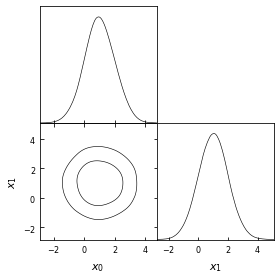

In [4]:
#Simulate Samples

names = ["x%s"%i for i in range(d)]
labels =  ["x_%s"%i for i in range(d)]

s = getdist.mcsamples.MCSamples(samples= samples, names = names, labels=labels)

plot = plots.get_subplot_plotter()
plot.triangle_plot(s)

## Convergence Test

From the random samples generated, this is to determine that the sample size is enough to converge to a given p-value, which is shown below! Different sample lengths are tested, and it can be shown that $ P(\theta) $ converges past $ 10^3 $ samples. Therefore, any chain with sample lengths greater than $10^3$ should be enough to accurately determine the probability.

[0.16536953 0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.16536953 0.1041006  0.         0.         0.         0.
 0.         0.         0.        ]
[0.16536953 0.1041006  0.07360074 0.         0.         0.
 0.         0.         0.        ]
[0.16536953 0.1041006  0.07360074 0.11376467 0.         0.
 0.         0.         0.        ]
[0.16536953 0.1041006  0.07360074 0.11376467 0.08484553 0.
 0.         0.         0.        ]
[0.16536953 0.1041006  0.07360074 0.11376467 0.08484553 0.13871776
 0.         0.         0.        ]
[0.16536953 0.1041006  0.07360074 0.11376467 0.08484553 0.13871776
 0.23482424 0.         0.        ]
[0.16536953 0.1041006  0.07360074 0.11376467 0.08484553 0.13871776
 0.23482424 0.15457354 0.        ]
[0.16536953 0.1041006  0.07360074 0.11376467 0.08484553 0.13871776
 0.23482424 0.15457354 0.14423322]


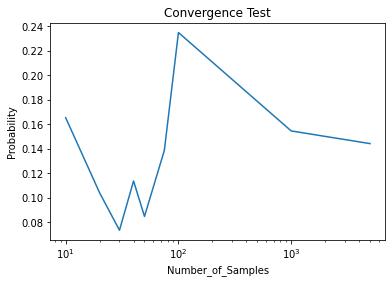

In [5]:
#Generate random samples to test where the convergence of the P(0) is!
sample_length = [10, 20, 30, 40, 50, 75, 100, 1000, 5000] #,10000, 15000, 20000]
pval = np.zeros(len(sample_length))
for i in range(len(sample_length)):
    length = sample_length[i]
    samples = np.random.multivariate_normal(mean, covariance, size=length)
    P=0
    for m in samples:
        P += (length)**(-1.0)*g.evaluate(x,m)
    
    pval[i] = P
    print(pval)
    
plt.title("Convergence Test")
plt.plot(sample_length, pval)
plt.xlabel("Number_of_Samples")
plt.ylabel("Probability")
plt.xscale('log')

## KD-Trees Method

### What KD-Trees is?
The KD-Trees, or k-dimensional trees method, is used to partition the given space (in this case, the sample space is being partitioned). This is used to order the data points, and throw away points that are far from the k nearest neighbors (where $k \in \set{Z^+}$). In all, it allows for the organization of points in k-dimensional space.

### What KD-Trees is used to do within this code?
The KD-Trees Method is used to organize the $ P(\theta) $ such that all of the indivdual p-values are ranked (rather indexed) greatest to least. This makes doing the KDE faster and easier, since all the p-values are well-ordered.


### What is being done right now with KD-Trees Method?
From the samples, the kd-trees method has been imposed on the sample space. After this, the nearest neighbor search will begin, and:

#1 The tree will be queried for the k=1000 nearest neighbors,

#2 The indicies of those neighbors will be found, then

#3 The data points will be extracted from said indicies.

The datapoints are useful to find the $P(\Delta\theta)$ in the next step.

In [6]:
#KD-Tree Time :O
#From samples, find k+1 nearest neighbors with kdtree, k=1000 nearest neighbors
kdtree = KDTree(samples)
#Query (Ask) the kdtree for nearest neighbors!
query = kdtree.query(x=np.zeros(d), k=1000)
#print(query)

In [7]:
#What are the indices of the Nearest Neighbors?
index = query[1]
#print(index)

In [8]:
#Now that the Index of the Nearest Neighbors are known, the indices could be used to find the data points of said NN!
data = kdtree.data[index]
#print(data)
print(type(data), data.shape)

<class 'numpy.ndarray'> (1000, 2)


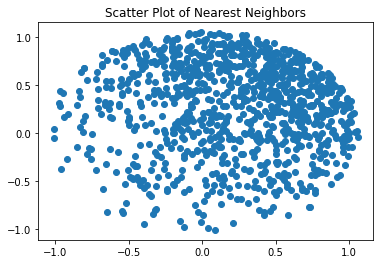

In [9]:
#Scatter Plot of the data
fig, bx= plt.subplots()
bx.scatter(data[:,0],data[:,1])
plt.title('Scatter Plot of Nearest Neighbors')
plt.show()

## Gaussian Around Sampled Points

In the last step, the data points were extracted, but now, we need to do a Gaussian of those sampled points to find their p-value, $P(\theta)$. The gaussian class is used once again to calculate the gaussian around the sampled points, which are the datapoints found in the last step.

### Code Description

 #1 From "samples," pick one data-point to be the "modelled point" and query the tree for the k=1000 nearest neighbors.
 
 #2 Get data-points of the nearest neighbors (insert Jeopardy music for how long it takes).
 
 #3 Do a Gaussian around each sampled-point, using the datapoints of the "modelled data," and comparing it to the "modelled point"(modpoint is the point being compared to).
 
 #4 Retrieve $P(\Delta\theta)$, which will be an array of p-values.

In [10]:
#Gaussian Around Sampled Points

pvalsamples = np.zeros(len(samples))  #Used to input $P_i(\theta)$ values

#Pick one data point as modelled point, compare every other point to "modelled" point
for i in range(len(samples)):
    modpoint = samples[i]
    modquery = kdtree.query(modpoint, k=1000)
    modindex = modquery[1]
    moddata = kdtree.data[modindex]
    print('\r' +str(i),end='')
    Pd = (1/1000)
    for j in range(len(moddata)):
        Pd += (1000)**(-1.0)*g.evaluate(moddata[j], modpoint)
        
    pvalsamples[i] = Pd #Pval of samples 


print(pvalsamples)

4999[1.25879817 0.13461552 1.40594039 ... 0.55342641 0.88392349 1.22449767]


Removed no burn in
Removed no burn in


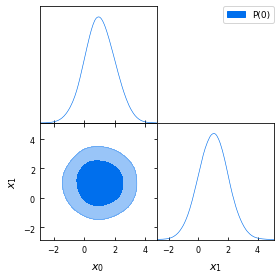

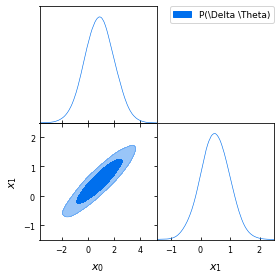

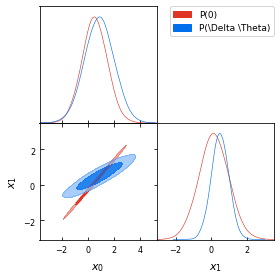

In [11]:
#Triangle Plots of P(0) and P(\Delta\Theta) individually to examine how they look like in each dimension

samples_MC = samples.copy()
pvalsamples_MC = pvalsamples.copy()

samples_MC, pvalsamples_MC = gaussian_mixtures.randomTestMCSamples(ndim=d, nMCSamples=2)

plot.triangle_plot([s], filled=True, legend_labels = ['P(0)'])

plot.triangle_plot([pvalsamples_MC], filled=True, legend_labels = ['P(\Delta \Theta)'])


#Plot how the P(0) compares with the P(\Delta\Theta)
plot.triangle_plot([samples_MC, pvalsamples_MC], filled=True, legend_labels = ['P(0)', 'P(\Delta \Theta)'])

## Compare $P(\Delta\theta)$ to $P(0)$
In order to calculate the shift, $\hat{\Delta}$, whose KDE estimate is:

$$\hat{\Delta} = \int_{P(x) > P(x_0)} P(x)dx$$.

This process is called neighbor elimination, where it can be observed that the probability does not depend on the actual value of $P(x)$, but rather its relative value compared to $P(x_0)$. 

$$\hat{\Delta} = \frac{1}{w_{tot}} \sum_{i=1}^n w_i S(\hat{P}(x) - \hat{P}(x_0))$$

This comes from the Monte-Carlo volume integral, which has a threshold crossing problem; since the kernal is positive, so we get rid of any $P(x) > P(x_0)$.


In [12]:
#Compare Values Pi to P0
#Want to count all points that satify (Pi > P0) for integration; save other points for later (into Reject they go)!

Accept = []   #Accept Pi >= P0
Reject = []   #Reject because Pi < P0

for i in range(len(pvalsamples)):
    Pi = pvalsamples[i]
    if (Pi >= P0):
        #print('Yeehaw!')
        Accept.append([i,Pi])
    else:
        #print('Nope lol, you tried')
        Reject.append([i,Pi])

print(len(Accept))
print(len(Reject))

#print(Accept)
#print(Reject)  

4699
301


## Rejected Values



In [13]:
#Which Pi < P0 to accept b/c boundary point? Redemption time!
# k==Nearest Neighbors, if nearest neighbor number is too low, won't count points that are maybe important

NN= int(1000)

Redemption = []
Death = []

# Reject[i] = [index,Pval]
for i in range(len(Reject)):
    Re = Reject[i][1] #Pval
    if (Re*(len(samples)- NN) >= P0):
        Redemption.append(Reject[i][0]) #append index
    else:
        Death.append(Re)
        
print(len(Redemption), len(Death))
print(Redemption)

301 0
[1, 30, 61, 78, 83, 85, 86, 92, 131, 173, 209, 228, 234, 252, 263, 271, 294, 296, 305, 309, 320, 366, 368, 393, 410, 420, 446, 465, 480, 481, 538, 552, 581, 584, 631, 662, 693, 715, 759, 824, 841, 862, 864, 869, 873, 894, 895, 910, 919, 922, 972, 981, 1024, 1027, 1044, 1066, 1076, 1077, 1088, 1105, 1124, 1125, 1148, 1181, 1184, 1191, 1201, 1244, 1273, 1307, 1309, 1310, 1329, 1337, 1353, 1370, 1377, 1406, 1411, 1430, 1432, 1458, 1473, 1495, 1501, 1504, 1509, 1518, 1526, 1536, 1554, 1592, 1594, 1599, 1603, 1609, 1630, 1632, 1655, 1666, 1669, 1679, 1682, 1683, 1684, 1713, 1734, 1739, 1758, 1778, 1790, 1794, 1808, 1828, 1840, 1843, 1873, 1898, 1906, 1921, 1932, 1934, 1974, 1981, 1986, 2000, 2011, 2012, 2040, 2048, 2053, 2064, 2070, 2152, 2182, 2246, 2253, 2261, 2262, 2271, 2279, 2291, 2310, 2329, 2335, 2342, 2379, 2384, 2423, 2425, 2477, 2495, 2500, 2518, 2557, 2565, 2611, 2614, 2617, 2619, 2627, 2639, 2658, 2710, 2711, 2715, 2720, 2749, 2757, 2763, 2768, 2775, 2800, 2833, 2881, 2882

In [14]:
#Redemption needs to be KDTree'd to find it's nearest nearest neighbors, but better than before

pxiarray = np.zeros(len(Redemption))
for i in range(len(Redemption)):
    xi = samples[Redemption[i]]
    xiquery = kdtree.query(xi, k=len(samples))
    xiindex = xiquery[1]
    xidata = kdtree.data[xiindex]   #Points that are NN
    Pxi = (len(samples))**(-1.0)
    for j in range(5*NN):
        Pxi += (len(samples))**(-1.0)*g.evaluate(xi, xidata[j])

    pxiarray[i]=Pxi

print(pxiarray)

[0.02692311 0.01591515 0.00360311 0.02216728 0.01308253 0.02575294
 0.01451083 0.02778704 0.00123922 0.00284264 0.02836423 0.01230242
 0.02100594 0.00099789 0.00728256 0.00501738 0.02561324 0.00169455
 0.02162053 0.0097282  0.02702225 0.02110955 0.02197703 0.02326845
 0.01702644 0.02501937 0.00314093 0.02013203 0.01451426 0.00811926
 0.01142751 0.02639698 0.01624136 0.0253715  0.02259178 0.00750929
 0.00100838 0.00335449 0.02847323 0.01028684 0.01469033 0.00538473
 0.02831088 0.02707359 0.01606103 0.02414044 0.01680837 0.01684933
 0.00391111 0.01385913 0.01386446 0.02148846 0.01902359 0.02748368
 0.01058716 0.01968534 0.00655278 0.01136441 0.00973342 0.01121918
 0.01674485 0.01417091 0.01565825 0.00278295 0.02514127 0.01946114
 0.00410999 0.02698433 0.00163806 0.02201752 0.01179054 0.00757349
 0.02482017 0.02212274 0.00799331 0.015647   0.01724486 0.01237827
 0.0194399  0.00208738 0.028173   0.0179887  0.01744837 0.02813979
 0.0236736  0.01990883 0.00627657 0.01384812 0.01116953 0.0031

In [15]:
#Check same conditions as before
Accept1 = []
Reject1 =[]
for i in range(len(pxiarray)):
    pxi = pxiarray[i]
    if (pxi >= P0):
        Accept1.append([i,pxi])
    else:
        Reject1.append([i, pxi])

print(len(Accept1))
print(len(Reject1))

0
301


In [16]:
#Out on the side, who will survive? How many points were lost in the fires of rejected points lol

#what comes out is the number of points that need to
Redemption1 = []
Death1 = []

for i in range(len(Reject1)):
    Re1 = Reject1[i][1] #Pval
    if (Re1*(len(samples)- NN) >= P0):
        Redemption1.append(Reject1[i][0]) #append index
    else:
        Death1.append(Re1)
        
print(len(Redemption1), len(Death1))
print(Redemption1)

301 0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [17]:
delta = len(Redemption1) #+ len(Redemption1) 
print(delta)

301


In [18]:
WEE = delta/len(samples)
print(WEE)

0.0602
